<a href="https://colab.research.google.com/github/clothesstore024/Cloth-shop/blob/main/cloth_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/clothesstore024/Cloth-shop/main/cloth_shop.csv'
df = pd.read_csv(url, encoding='ISO-8859-1', delimiter=',')


In [8]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [20]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Age'].mean()

43.198543813335604

In [23]:
df['Positive Feedback Count'].mean()

2.535936302478072

In [35]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

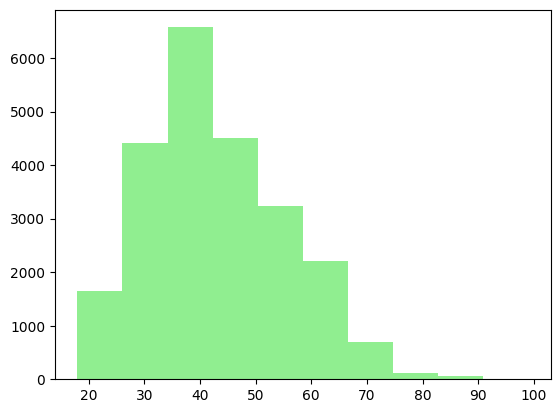

In [36]:
fig, ax = plt.subplots()
_ = plt.hist(df['Age'], color = 'lightgreen')

In [62]:
minimum_age = df['Age'].min()
minimum_age

18

In [63]:
maximum_age = df['Age'].max()
maximum_age

99

In [64]:
most_repeated_age = df['Age'].mode()
most_repeated_age

0    39
Name: Age, dtype: int64

In [31]:
mean = df['Age'].mean()
mean

43.198543813335604

In [33]:
median = np.median(df['Age'])
median 

41.0

In [66]:
product_ratings = df.groupby('Clothing ID')['Rating'].count().reset_index()

In [67]:
top_rated_products = product_ratings.sort_values('Rating', ascending=False)
print(top_rated_products.head(10))


      Clothing ID  Rating
1078         1078    1024
862           862     806
1094         1094     756
1081         1081     582
872           872     545
829           829     527
1110         1110     480
868           868     430
895           895     404
936           936     358


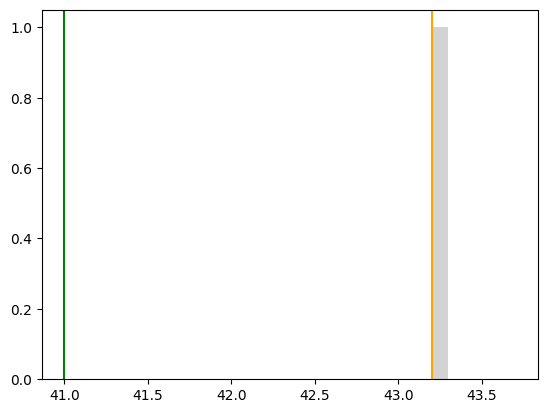

In [37]:
fig, ax = plt.subplots()
plt.axvline(mean, color='orange')
plt.axvline(median, color='green')
_ = plt.hist(mean, color = 'lightgray')

In [38]:
varianse  = df['Age'].var()
varianse

150.78719140721378

In [39]:
sigma = df['Age'].std()
sigma

12.279543615591493

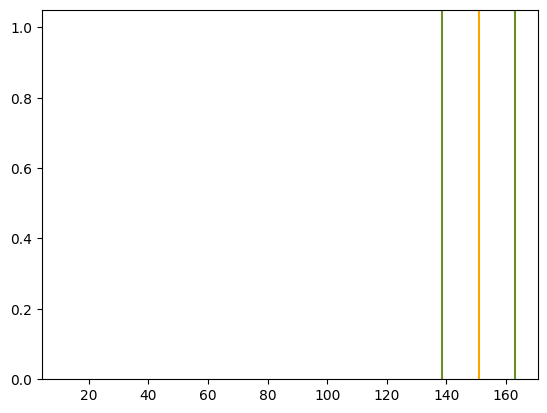

In [40]:
fig, ax = plt.subplots()
plt.axvline(varianse, color='orange')
plt.axvline(varianse+sigma, color='olivedrab')
plt.axvline(varianse-sigma, color='olivedrab')
_ = plt.hist(sigma, color = 'lightgray')

In [41]:
df['Age'].std()/(df['Age'].size)**(1/2)

0.08012678135503898

In [42]:
st.sem(df['Age'])

0.08012678135503898

In [43]:
st.sem(df['Age'], ddof=0)

0.0801250754954994

In [44]:
sns.set_style('ticks')

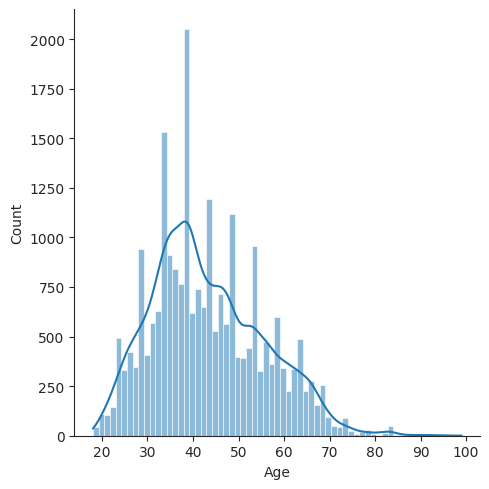

In [45]:
_ = sns.displot(df['Age'], kde=True)

In [46]:
x1_sample = np.random.choice(df['Age'], size=5000, replace=False)
x2_sample = np.random.choice(df['Age'], size=10000, replace=False)

In [47]:
x1_sample.mean()

42.9624

In [48]:
x2_sample.mean()

43.2293

In [49]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [50]:
xc = sample_mean_calculator(df['Age'], 25, 7)

In [51]:
xc

[44.52, 44.0, 40.88, 41.84, 39.88, 43.32, 43.32]

In [57]:
len(np.where(df['Age'] > 40)[0])

12236

In [61]:
np.percentile(df['Rating'], 99.5)

5.0